In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
import tensorflow as tf
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir) / "flower_photos"  # 👈 Fix: go one level deeper

print("Data directory:", data_dir)


Data directory: C:\Users\Pushpak Warke\.keras\datasets\flower_photos\flower_photos


In [12]:
#Number of images in dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


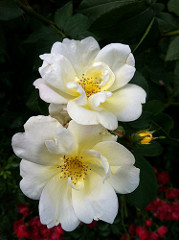

In [15]:
#Roses
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

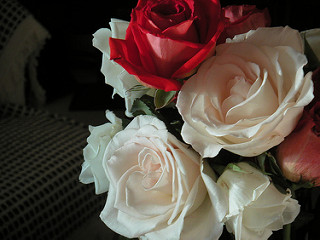

In [16]:
PIL.Image.open(str(roses[1]))

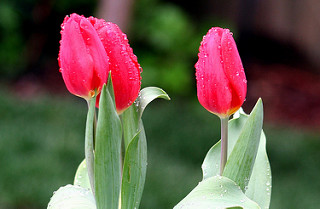

In [17]:
#Tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

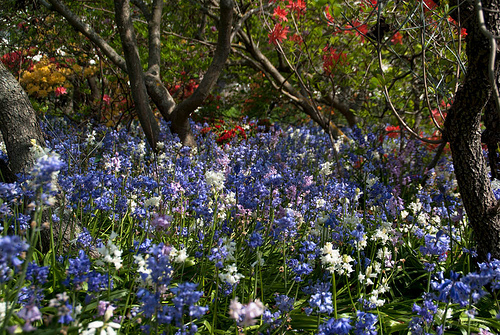

In [18]:
PIL.Image.open(str(tulips[1]))

In [19]:
batch_size = 32
img_height = 180
img_width = 180

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


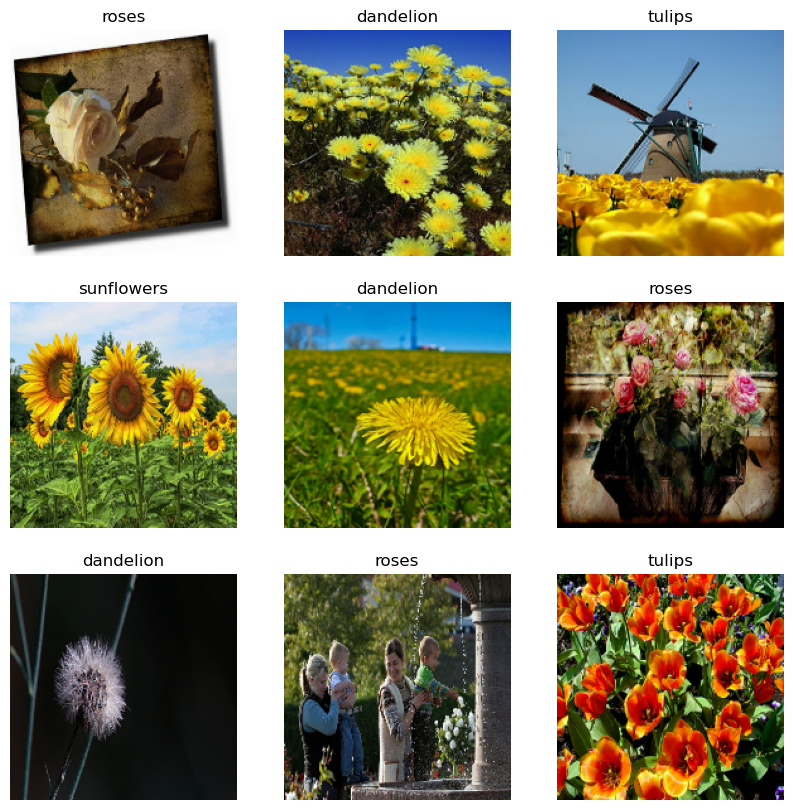

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
normalization_layer = layers.Rescaling(1./255)

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

D:\New folder\envs\theano_env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#from tensorflow import keras
#from tensorflow.keras import layers

#model = keras.Sequential([
#    keras.Input(shape=(180, 180, 3)),              # ✅ New Input layer
#    layers.Rescaling(1./255),
#    layers.Conv2D(16, 3, activation='relu'),
#    layers.MaxPooling2D(),
#    layers.Conv2D(32, 3, activation='relu'),
#    layers.MaxPooling2D(),
#    layers.Flatten(),
#    layers.Dense(128, activation='relu'),
#    layers.Dense(5)                                # (5 flower classes)
#])

#   REMOVE WARNING & FOLLOWS MODERN API DESIGN & FOR KERAS3 USE THIS INSTEAD OF input_shape

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 276ms/step - accuracy: 0.4755 - loss: 1.2437 - val_accuracy: 0.5899 - val_loss: 1.0552
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 263ms/step - accuracy: 0.6182 - loss: 0.9806 - val_accuracy: 0.6322 - val_loss: 0.9236
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.6996 - loss: 0.7974 - val_accuracy: 0.6349 - val_loss: 0.9232
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.7790 - loss: 0.6024 - val_accuracy: 0.6703 - val_loss: 0.9126
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.8696 - loss: 0.3889 - val_accuracy: 0.6526 - val_loss: 1.0293
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.9298 - loss: 0.2148 - val_accuracy: 0.6458 - val_loss: 1.1115
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.9574 - loss: 0.1280 - val_accuracy: 0.6471 - val_loss: 1.4473
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.9721 - loss: 0.0909 - val_accu

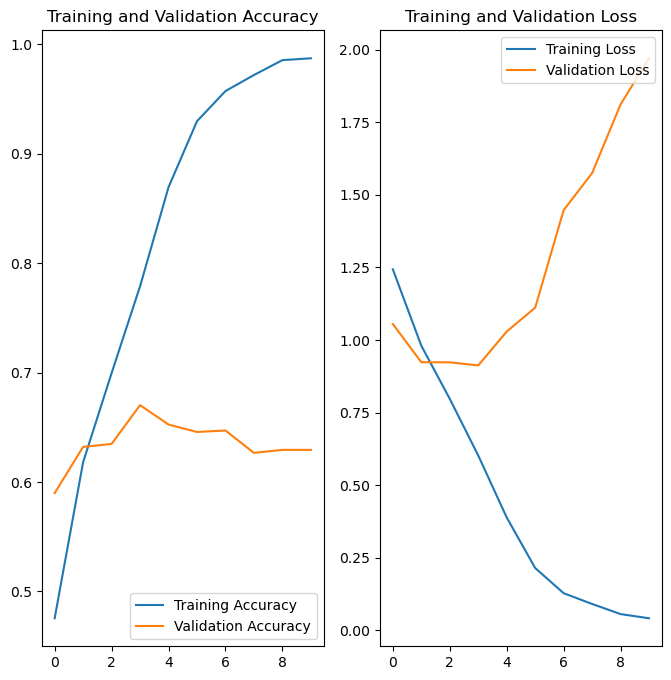

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

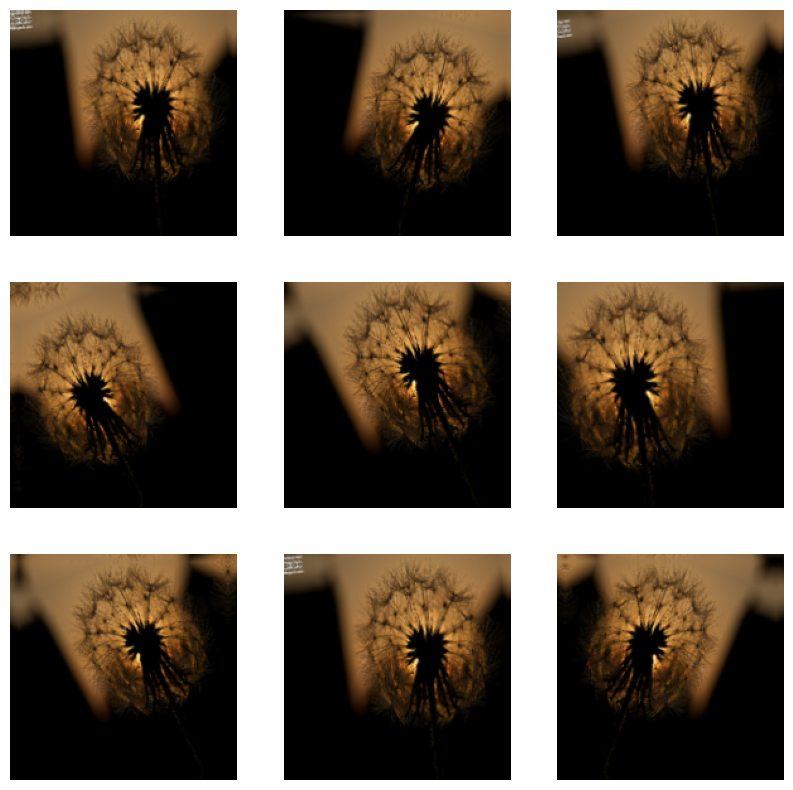

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

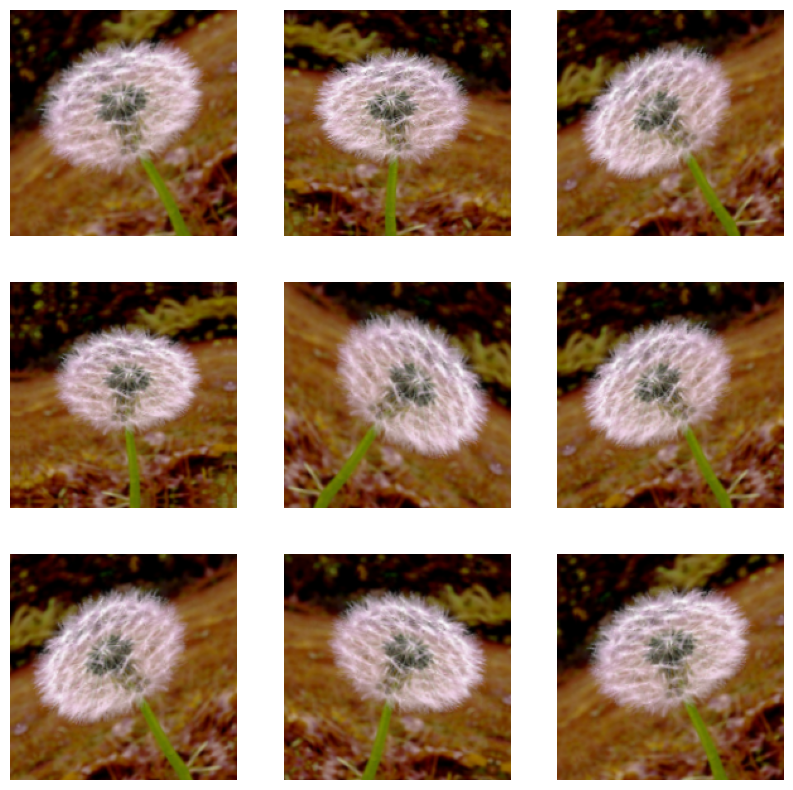

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 278ms/step - accuracy: 0.9830 - loss: 0.0519 - val_accuracy: 0.6294 - val_loss: 2.0123
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.9966 - loss: 0.0182 - val_accuracy: 0.6335 - val_loss: 2.1239
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.9915 - loss: 0.0372 - val_accuracy: 0.5940 - val_loss: 2.3282
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.9925 - loss: 0.0312 - val_accuracy: 0.6499 - val_loss: 2.1368
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.9956 - loss: 0.0175 - val_accuracy: 0.6349 - val_loss: 2.3214
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 0.9830 - loss: 0.0588 - val_accuracy: 0.6104 - val_loss: 2.4367
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.9840 - loss: 0.0597 - val_accuracy: 0.6362 - val_loss: 1.9769
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.9969 - loss: 0.0117 - val_accu